In [1]:
import pandas as pd
import numpy as np
from copy import deepcopy
import numpy.polynomial.polynomial as mypoly

In [50]:
import matplotlib
import matplotlib.pyplot as plt
fs = 14
matplotlib.rcParams['font.size']=fs

### 1. Load light curves

In [4]:
lcp48 = pd.read_csv("../data/photometry/P48/detection.csv")
lcp48 = lcp48.rename(columns={'mag_unc': 'emag'})
lcp48["instrument"] = "P48"
filters = np.array([" "]*len(lcp48))
filterids = lcp48["filterid"].values
filters[filterids==1] = 'g'
filters[filterids==2] = 'r'
filters[filterids==3] = 'i'
lcp48["filter"] = filters
lcp48 = lcp48.drop(columns = ["Fratio", "Fratio_unc", "filterid"])
lcp60lt = pd.read_csv("../data/photometry/LT+P60/phot.csv")
lcp60lt = lcp60lt.drop(columns=["limmag"])
np.unique(lcp60lt["instrument"])
lclt = deepcopy(lcp60lt[lcp60lt.instrument == "LT+IOO"])
lcp60 = deepcopy(lcp60lt[lcp60lt.instrument == "P60+SEDM"])
lcuvot = pd.read_csv("../data/photometry/Swift/phot.csv")
lcuvot = lcuvot.drop(columns = ["limmag"])

### 2. Attach effective wavelength

In [5]:
from helper.readfilter import see_filters

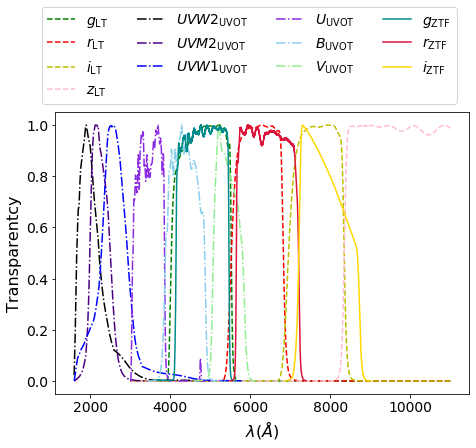

In [6]:
see_filters()

In [7]:
from helper.readfilter import get_ZTF_eff_wave, get_LT_eff_wave, get_UVOT_eff_wave, get_P60_eff_wave

#### Swift / UVOT

In [8]:
wvU, xU, yU = get_UVOT_eff_wave("Swift_UVOT.U.dat", return_type = 'more')
wvB, xB, yB = get_UVOT_eff_wave("Swift_UVOT.B.dat", return_type = 'more')
wvV, xV, yV = get_UVOT_eff_wave("Swift_UVOT.V.dat", return_type = 'more')
wvUW1, xUVW1, yUVW1 = get_UVOT_eff_wave("Swift_UVOT.UVW1.dat", return_type = 'more')
wvUW2, xUVW2, yUVW2 = get_UVOT_eff_wave("Swift_UVOT.UVW2.dat", return_type = 'more')
wvUM2, xUVM2, yUVM2 = get_UVOT_eff_wave("Swift_UVOT.UVM2.dat", return_type = 'more')
#print (wvUW2, wvUM2, wvUW1, wvU, wvB, wvV)

lcuvot['wave'] = np.zeros(len(lcuvot))
lcuvot['wave'].values[lcuvot["filter"].values=="B"] = wvB
lcuvot['wave'].values[lcuvot["filter"].values=="U"] = wvU
lcuvot['wave'].values[lcuvot["filter"].values=="V"] = wvV
lcuvot['wave'].values[lcuvot["filter"].values=="UVM2"] = wvUM2
lcuvot['wave'].values[lcuvot["filter"].values=="UVW1"] = wvUW1
lcuvot['wave'].values[lcuvot["filter"].values=="UVW2"] = wvUW2

#### P48

In [9]:
wvg, xg, yg = get_ZTF_eff_wave("P48_g.dat", return_type = 'more')
wvr, xr, yr = get_ZTF_eff_wave("P48_R.dat", return_type = 'more')
wvi, xi, yi = get_ZTF_eff_wave("P48_i.dat", return_type = 'more')

In [10]:
lcp48['wave'] = np.zeros(len(lcp48))
lcp48['wave'].values[lcp48["filter"].values=="g"] = wvg
lcp48['wave'].values[lcp48["filter"].values=="r"] = wvr
lcp48['wave'].values[lcp48["filter"].values=="i"] = wvi

In [11]:
nondec = pd.read_csv("../data/photometry/P48/upperlim.csv")
nondec['wave'] = np.zeros(len(nondec))
nondec['wave'].values[nondec["filterid"].values==1] = wvg
nondec['wave'].values[nondec["filterid"].values==2] = wvr
nondec['wave'].values[nondec["filterid"].values==3] = wvi

In [12]:
#lcp48.head()

#### LT

In [13]:
wvg_lt, xg_lt, yg_lt = get_LT_eff_wave('IOO_SDSS-G.txt', return_type = 'more')
wvr_lt, xr_lt, yr_lt = get_LT_eff_wave('IOO_SDSS-R.txt', return_type = 'more')
wvi_lt, xi_lt, yi_lt = get_LT_eff_wave('IOO_SDSS-I.txt', return_type = 'more')
wvz_lt, xz_lt, yz_lt = get_LT_eff_wave('IOO_SDSS-Z.txt', return_type = 'more')
lclt['wave'] = np.zeros(len(lclt))
lclt.loc[lclt["filter"].values=="g", 'wave'] = wvg_lt
lclt.loc[lclt["filter"].values=="r", 'wave'] = wvr_lt
lclt.loc[lclt["filter"].values=="i", 'wave'] = wvi_lt
lclt.loc[lclt["filter"].values=="z", 'wave'] = wvz_lt

#### P60/SEDM

In [14]:
# lcp60

In [15]:
wvi_p60, xi_p60, yi_p60 = get_P60_eff_wave(myfilter = "i'", return_type = 'more')
wvr_p60, xr_p60, yr_p60 = get_P60_eff_wave(myfilter = "r'", return_type = 'more')

In [16]:
lcp60['wave'] = np.zeros(len(lcp60))
lcp60['wave'].values[lcp60["filter"].values=="r"] = wvr_p60
lcp60['wave'].values[lcp60["filter"].values=="i"] = wvi_p60

In [17]:
lcall = pd.concat([lcp48, lcp60, lclt, lcuvot], sort=True)

 Significant figures CLEAN UP

In [18]:
lcall = lcall.round({'emag': 2, 'mag': 2, 'mjd': 4, 'wave': 1})

In [19]:
#lcall.head()

In [20]:
len(lcall)

119

In [21]:
np.unique(lcall["wave"])

array([2079. , 2255.1, 2614.2, 3475.5, 4359.1, 4795.5, 4814. , 5430.1,
       6187.6, 6348.8, 6421.8, 7658.7, 7681.9, 7883.1, 9669.8])

In [22]:
lcall.to_csv("../data/photometry/photall.txt", sep='\t', encoding = 'utf-8', index = False)

### 3. Galactic extinction correction, Calculate absolute mag

In [23]:
z = 0.0213
ebv = 0.022
t_max = 58583.2 # see below part 4

In [24]:
from helper.app2abs import deredden_df, app2abs_df, add_physcol, add_datecol

In [25]:
lcall.columns

Index(['emag', 'filter', 'instrument', 'mag', 'mjd', 'wave'], dtype='object')

In [26]:
tb = deredden_df(lcall, ebv = ebv)
tb = app2abs_df(tb, z=z, t_max = t_max)
tb = add_physcol(tb)
tb = add_datecol(tb)

In [27]:
# tb.head()

In [28]:
tb.to_csv("../data/otherSN/Yao2020/lc_at2019dge.csv", index = False)

### 4. Estimate peak magnitude time

In [29]:
tb["mjd"][tb["mag"].values == min(tb["mag"])]

5    58582.8337
Name: mjd, dtype: float64

In [30]:
    ms = 4
    mylc = tb[tb.instrument=='P48']
    ltlc = tb[tb.instrument=='LT+IOO']
    t0guess = 58583.19
    
    # P48 data
    for myfilter in ['g', 'r']:
        ix = mylc['filter'].values == myfilter
        mymag = mylc['mag0_abs'].values[ix]
        mymag_unc = mylc['emag'].values[ix]
        mjd = mylc['mjd'].values[ix]
        mytime = mjd - t0guess
        
        if myfilter == 'g':
            xg1 = mytime
            yg1 = mymag
            eyg1 = mymag_unc
        elif myfilter == 'r':
            xr1 = mytime
            yr1 = mymag
            eyr1 = mymag_unc
            
    # LT data
    for myfilter in ['g', 'r']:
        ix = ltlc['filter'].values== myfilter
        mlt = ltlc[ix]
        mjds = mlt['mjd'].values
        mytime = mjds  - t0guess
        mags = mlt['mag0_abs'].values 
        mags_unc = mlt['emag'].values 
        
        if myfilter=='g':
            color = 'g'
            xg2 = mytime
            yg2 = mags
            eyg2 = mags_unc
        elif myfilter == 'r':
            color = 'r'
            xr2 = mytime
            yr2 = mags
            eyr2 = mags_unc
            
    xg = np.hstack([xg1, xg2])
    yg = np.hstack([yg1, yg2])
    eyg = np.hstack([eyg1, eyg2])
    xr = np.hstack([xr1, xr2])
    yr = np.hstack([yr1, yr2])
    eyr = np.hstack([eyr1, eyr2])

In [31]:
def minor_plot(tb, fig, minor_loc = [0.52, 0.54, 0.4, 0.28], pub = True):  
    ms = 4
    mylc = tb[tb.instrument=='P48']
    ltlc = tb[tb.instrument=='LT+IOO']
    axi = fig.add_axes(minor_loc) # [left, bottom, width, height
            
    # P48
    axi.errorbar(xg1, yg1, eyg1, fmt='o', color='royalblue', markersize=ms, zorder=2)
    axi.errorbar(xr1, yr1, eyr1, fmt='o', color='crimson', markersize=ms, zorder=2)
        
    # LT
    axi.errorbar(xg2, yg2, eyg2, fmt='*', color='g', markersize=ms+2, zorder=2)
    axi.errorbar(xr2, yr2, eyr2, fmt='*', color='r', markersize=ms+2, zorder=2)
        
    axi.invert_yaxis()

    gap_polyfit(xg, yg, eyg, axi, color='royalblue')
    gap_polyfit(xr, yr, eyr, axi, color='crimson')
    axi.set_xlim(-3.3, 5.5)
    axi.set_ylim(-13.7, -16.7)
    
    if pub == True:
        axi.xaxis.set_major_locator(plt.MultipleLocator(1))
        axi.xaxis.set_minor_locator(plt.MultipleLocator(0.2))
        axi.yaxis.set_major_locator(plt.MultipleLocator(1))
        axi.yaxis.set_minor_locator(plt.MultipleLocator(0.2))
        axi.tick_params(which = 'major', length = 4, top=True)
        axi.tick_params(which = 'minor', length = 2, top=True)
        axi.tick_params(direction='in', axis='both', which = 'both')
        axi.grid(ls=":")

In [32]:
def bic_poly_fit(t1, mag1, e_mag1, order, ax, color =None):
    N = len(t1)
    coefs = mypoly.polyfit(t1, mag1, order, w=1/e_mag1**2)
    tstart = np.round(t1[0], 1) - 0.2
    tend = np.round(t1[-1], 1) + 0.2
    nt = int(np.round(((tend - tstart) / 0.01) + 1, 0))
    xnew = np.linspace(tstart, 
                       tend, nt)
    ynew1 = mypoly.polyval(xnew, coefs)
    #plt.errorbar(t1, mag1, e_mag1, fmt='.g')
    
    mag1_fitted = mypoly.polyval(t1, coefs)
    chi2 = np.sum((mag1 - mag1_fitted)**2 / e_mag1**2)
    bic = chi2 + (order+1) * np.log(N)
    if color==None:
        ax.plot(xnew, ynew1, label='order = %d, bic = %.2f'%(order, bic))
    else:
        ax.plot(xnew, ynew1, color = color, linestyle = '-.')
        ix= ynew1 == min(ynew1)
        xmax = xnew[ix]
        print ("max light in %s"%color, "%.4f"%xmax)
        print ("max light in %s"%color, min(ynew1))
        ax.plot([xmax, xmax], [min(mag1),max(mag1)], color = color, linestyle = ':')
    return bic
    
    
def gap_polyfit(x, y, ey, axi, color='royalblue'):    
    ix = np.argsort(x)
    x = x[ix]
    y = y[ix]
    ey = ey[ix]
    
    ix = (x>-2)&(x<3)
    x = x[ix]
    y = y[ix]
    ey = ey[ix]
    
    if color == 'royalblue':
        order = 3
        bic_poly_fit(x, y, ey, order, axi, color = color)
    if color == 'crimson':
        order = 3
        bic_poly_fit(x, y, ey, order, axi, color = color)

In [33]:
%matplotlib inline

max light in royalblue 0.0000
max light in royalblue -16.452967886700492
max light in crimson 0.2200
max light in crimson -16.271680481138095


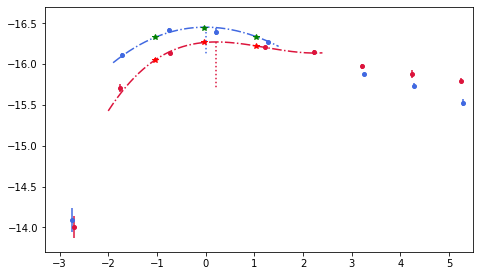

In [34]:
fig = plt.figure(figsize=(7, 4))
minor_plot(tb, fig, minor_loc = [0.1, 0.1, 0.85, 0.85], pub = False)

In [35]:
t0guess

58583.19

In [36]:
58583.2 - 2

58581.2

In [37]:
58583.2 + 2

58585.2

Therefore, maximum light at g-band is at MJD=58583.18. maximum light at r-band is at MJD=58583.18+0.23.

Since we are not interested in many significant figures. Let's say g-band max time is MJD=58583.2. r-band max time is at MJD=58583.4.

### 5. Make light curve figure

In [38]:
    magoffsetg = -2
    magoffseti = 1
    magoffsetz = 2

In [39]:
def major_plot(tb, axi):
    mylc = tb[tb.instrument=='P48']
    ltlc = tb[tb.instrument=='LT+IOO']
    p60lc = tb[tb.instrument=='P60+SEDM']
    
    ms = 4

    for i in ['g', 'r', 'i']:
        ix = mylc['filter'].values == i
        mytime_det = mylc['tmax_of'].values[ix]
        mags = mylc['mag0_abs'].values[ix]
        mags_unc = mylc['emag'].values[ix]
        
        if i == 'g':
            color = 'royalblue'
            mags += magoffsetg
            mylabel1 = 'P48 $g-2$'
        elif i == 'r':
            color='crimson'
            mylabel1 = 'P48 $r$'
        elif i == 'i':
            color='goldenrod'
            mylabel1 = 'P48 $i+1$'
            mags += magoffseti
        
        axi.errorbar(mytime_det, mags, mags_unc, fmt='o', color=color, 
                     markersize=ms, zorder=2, label = mylabel1)
    
    #axi.set_yticklabels([])
    axi.tick_params(direction='in', axis='both', which = 'both')
    axi.invert_yaxis()
    
    # plot LT light curve
    for myfilter in ['g', 'r', 'i', 'z']:
        ix = ltlc['filter'].values==myfilter
        mlt = ltlc[ix]
        mytime = mlt['tmax_of'].values 
        mymag = mlt['mag0_abs'].values 
        ind = mymag!=99
        mytime_det = mytime[ind]
        mags = mymag[ind] 
        mags_unc = mlt['emag'].values[ind]
        
        if myfilter=='g':
            color = 'g'
            mags += magoffsetg
            mylabel1 = 'LT $g-2$'
        elif myfilter == 'r':
            color = 'r'
            mylabel1 = 'LT $r$'
        elif myfilter == 'i':
            color = 'y'
            mags += magoffseti
            mylabel1 = 'LT $i+1$'
        elif myfilter == 'z':
            color = 'pink'
            mags += magoffsetz
            mylabel1 = 'LT $z+2$'
            
        axi.errorbar(mytime_det, mags, mags_unc, fmt='*', color=color, 
                     markersize=ms+2, zorder=2, label = mylabel1)

In [40]:
from allsn_info import get_at2019dge

In [43]:
result = get_at2019dge(colorplt=False)
t0jd = result['t_max']
tspecs = result['tspecs']
tb = result['tb']
dis_mod = tb["mag0"].values[0] - tb["mag0_abs"].values[0] 

In [44]:
def mark_spec_epochs(tspecs, t0jd):
    # plot spec epochs
    mupp = -18.9
    mbottom = -19.
    for t in tspecs:
        if t<(t0jd +40):
            axi.plot([t-t0jd,t-t0jd], [mupp, mbottom], 'k-')
            axi.text(t-t0jd-0.7, mupp-0.25, 'S')
    axi.set_ylim(-11.3, mbottom)

In [45]:
def create_new_yticks1_abs(ylims1):
    yticks1_new = []
    candi = np.arange(-23, -10)
    for x in candi:
        if x<ylims1[0] and x>ylims1[1]:
            yticks1_new.append(x)
    yticks1_new = np.array(yticks1_new)
    return yticks1_new
    


def create_new_yticks2(ylims2):
    yticks2_new = []
    candi = np.arange(8, 24)
    for x in candi:
        if x<ylims2[0] and x>ylims2[1]:
            yticks2_new.append(x)
    yticks2_new = np.array(yticks2_new)
    return yticks2_new

In [46]:
nondec = deredden_df(nondec, ebv = ebv)
nondec = app2abs_df(nondec, z=z, t_max = t_max)

In [47]:
20.5 - dis_mod

-14.336666595322477

In [48]:
def add_upper_limit(mylc):
    for i in [1,2,3]:
        ix = mylc['filterid'].values == i
        mytime_upp = mylc['tmax_of'].values[ix]
        uppmags = mylc['limmag0_abs'].values[ix]
        
        if i == 1:
            color = 'royalblue'
            uppmags += magoffsetg
            #mylabel1 = 'P48 $g-2$'
        elif i == 2:
            color='crimson'
            #mylabel1 = 'P48 $r$'
        elif i == 3:
            color='goldenrod'
            #mylabel1 = 'P48 $i+1$'
            uppmags += magoffseti
        
        for j in range(len(uppmags)):
            if uppmags[j] > -14.3 or (mytime_upp[j]<0):
                axi.arrow(mytime_upp[j], uppmags[j], 0, 0.15, 
                      head_width=0.5, head_length=0.08, alpha=0.5,
                      width = 0.1, fc=color, ec=color, zorder=2)
                axi.plot([mytime_upp[j]-0.4, mytime_upp[j]+0.4], 
                     [uppmags[j], uppmags[j]], linewidth=1, alpha=0.5,
                     color = color, zorder=2)

max light in royalblue 0.0000
max light in royalblue -16.452967886700492
max light in crimson 0.2200
max light in crimson -16.271680481138095


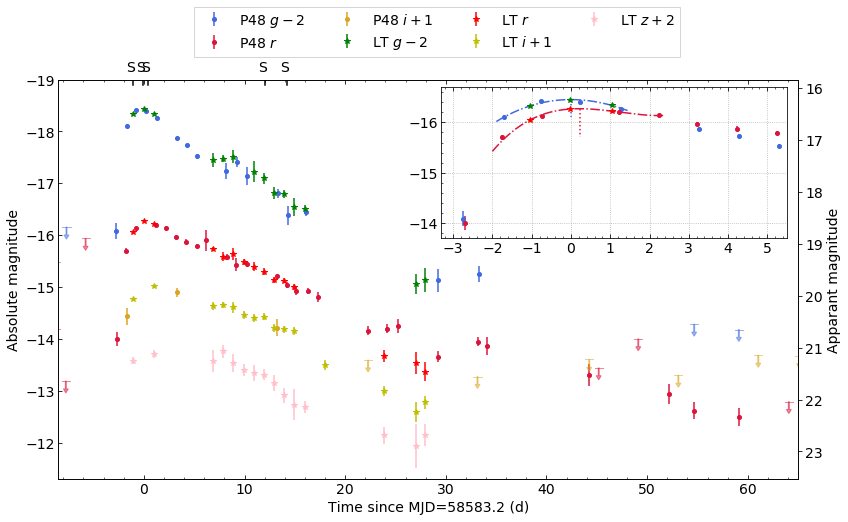

In [51]:
fig = plt.figure(figsize=(12, 7.5))
axi = plt.subplot(111)
add_upper_limit(nondec)
major_plot(tb, axi)
    
mark_spec_epochs(tspecs, t0jd)

ylims1 = axi.get_ylim()
ylims2 = (ylims1[0] + dis_mod, ylims1[1] + dis_mod)
yticks2_label = create_new_yticks2(ylims2)
yticks2_real = []
for x in yticks2_label:
    yticks2_real.append(x - dis_mod)
yticks2_real = np.array(yticks2_real)

axi2 = axi.twinx()
axi2.set_yticks(yticks2_real)
axi2.set_ylim(ylims1[0], ylims1[1])
axi2.set_yticklabels(yticks2_label)

axi.set_ylabel('Absolute magnitude')
axi2.set_ylabel('Apparant magnitude')
axi.set_xlabel('Time since MJD=%.1f'%t0jd + ' (d)')
    
axi.xaxis.set_major_locator(plt.MultipleLocator(10))
axi.xaxis.set_minor_locator(plt.MultipleLocator(2))
axi.tick_params(which = 'major', length = 4, top=True)
axi.tick_params(which = 'minor', length = 2, top=True)
    
axi.set_xlim(-8.5, 65)
axi.legend(loc='upper right', ncol = 4,
           bbox_to_anchor=(0.85, 1.2), fancybox=False, frameon=True)
    
plt.tight_layout()
minor_plot(tb, fig)
    
plt.savefig('../paper/figures/lightcurve.pdf')
#plt.close()